
# Modelo Matemático de la Neurona y Funciones de Activación

En esta sección se explica en detalle el modelo matemático utilizado para representar una neurona artificial y se analizan las funciones de activación empleadas para transformar la combinación lineal de entradas en una salida procesable. Se describe la fórmula utilizada, junto con las propiedades, ventajas y desventajas de funciones como la sigmoide, ReLU, tanh y softmax.



## Modelo Matemático de la Neurona

Una neurona artificial se representa mediante la siguiente combinación lineal:

$$
z = \sum_{i=1}^{n} w_i \, x_i + b
$$

donde:
- **$x_i$** representa cada una de las entradas, que pueden ser características o datos provenientes del conjunto de datos.
- **$w_i$** es el peso asignado a cada entrada, indicando la importancia de $x_i$ en el proceso de activación.
- **$b$** es el sesgo, que permite ajustar el umbral de activación.
- **$n$** es el número total de entradas.

Una vez calculado $z$, se aplica una función de activación $f(z)$ para obtener la salida final:

$$
a = f(z)
$$



## Funciones de Activación

A continuación se explican las funciones de activación utilizadas, con sus fórmulas, propiedades, ventajas y desventajas.

### Función Sigmoide

La función sigmoide se define como:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

**Ventajas:**
- Transforma cualquier valor real en el rango $(0, 1)$, lo que permite interpretar la salida como una probabilidad.
- Su derivada se calcula como: $$\sigma'(z) = \sigma(z)(1 - \sigma(z)).$$

**Desventajas:**
- No está centrada en cero, ya que $$\sigma(0)=0.5,$$ lo que puede introducir un sesgo en la propagación de la información.
- Puede saturarse para valores muy altos o muy bajos de $z$, lo que provoca gradientes muy pequeños.

### Función ReLU (Rectified Linear Unit)

La función ReLU se expresa como:

$$
\text{ReLU}(z) = \max(0, z)
$$

**Ventajas:**
- Es muy rápida y sencilla de calcular.
- Activa únicamente las neuronas con $z>0$, lo que puede generar modelos más esparsos.
- Evita la saturación en la parte positiva.

**Desventajas:**
- Para $z \leq 0$, la derivada es cero, lo que puede llevar a que algunas neuronas se "apaguen" durante el entrenamiento.

### Función tanh (Tangente Hiperbólica)

La función tanh se define como:

$$
\tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}
$$

**Propiedades:**
- La salida se sitúa en el rango $(-1, 1)$.
- Está centrada en cero: $$\tanh(0)=0.$$ Por ejemplo, al comparar con la sigmoide, donde $$\sigma(0)=0.5,$$ disponer de una salida de $0$ facilita que los valores positivos y negativos se distribuyan de forma equilibrada, favoreciendo el flujo del gradiente.
- Su derivada es: $$\tanh'(z) = 1 - \tanh^2(z).$$

**Ventajas:**
- Al estar centrada en cero, evita el sesgo en las activaciones, lo que a menudo mejora la convergencia durante el entrenamiento.
- Suele dar mejores resultados en capas ocultas.

**Desventajas:**
- Puede saturarse para valores extremos de $z$, reduciendo la magnitud del gradiente.

### Función Softmax

La función softmax se utiliza principalmente en la capa de salida para problemas de clasificación multiclase. Dado un vector de activaciones

$$
z = [z_1, z_2, \dots, z_K],
$$

se define como:

$$
\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}, \quad i = 1, \dots, K.
$$

**Propiedades:**
- Convierte un conjunto de valores en una distribución de probabilidad, de forma que la suma de las salidas es $1$.

**Ventajas:**
- Facilita la interpretación de las salidas como probabilidades en problemas multiclase.

**Desventajas:**
- Puede ser sensible a la escala de los valores en $z$, requiriendo en ocasiones normalización.



## Ejemplo Práctico: Visualización de Funciones de Activación

A continuación se muestra cómo se comportan las funciones sigmoide, ReLU y tanh. Con este ejemplo se puede visualizar la relación entre el valor $z$ y la salida de cada función, lo que ayuda a comprender mejor sus propiedades.


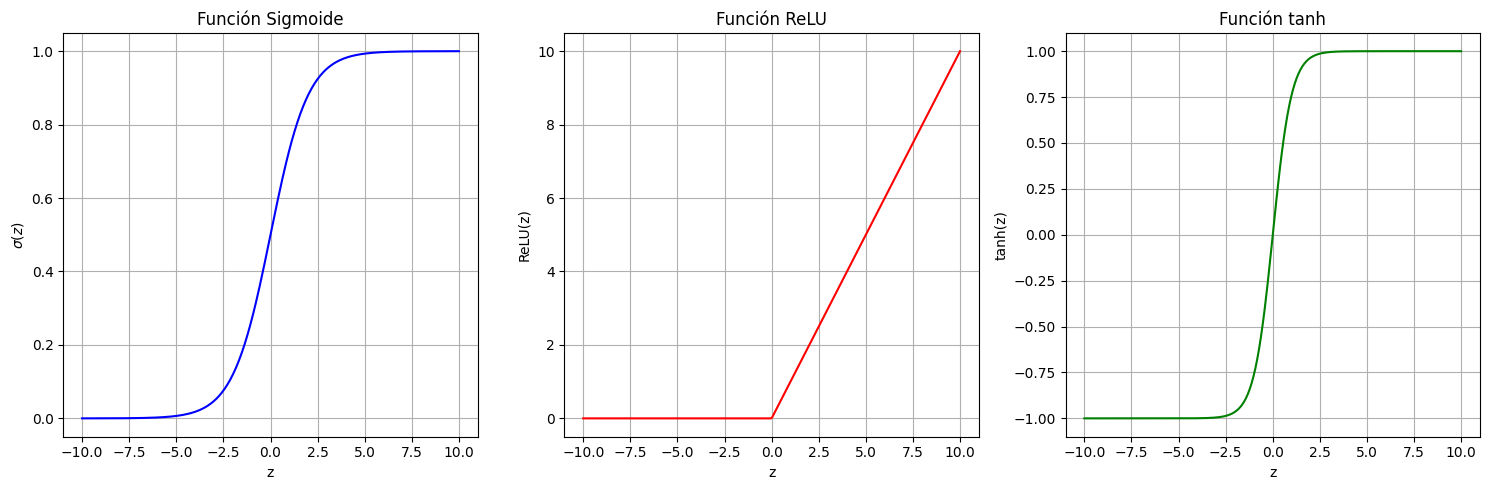

In [1]:
# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt

# Rango de valores para z
z_values = np.linspace(-10, 10, 400)

# Definir las funciones de activación
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def tanh(z):
    return np.tanh(z)

# Calcular las salidas para cada función
sigmoid_values = sigmoid(z_values)
relu_values = relu(z_values)
tanh_values = tanh(z_values)

# Configurar la figura para visualizar las tres funciones
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(z_values, sigmoid_values, color='blue')
plt.title('Función Sigmoide')
plt.xlabel('z')
plt.ylabel('$\\sigma(z)$')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(z_values, relu_values, color='red')
plt.title('Función ReLU')
plt.xlabel('z')
plt.ylabel('ReLU(z)')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(z_values, tanh_values, color='green')
plt.title('Función tanh')
plt.xlabel('z')
plt.ylabel('tanh(z)')
plt.grid(True)

plt.tight_layout()
plt.show()



::: tip Consejo
En esta sección se ha explicado cómo se representa una neurona artificial mediante una combinación lineal de entradas y un sesgo, y cómo se transforma ese valor usando diversas funciones de activación.

- La función sigmoide transforma cualquier valor real en un número entre $0$ y $1$, pero no está centrada en cero.
- La función ReLU activa solo los valores positivos, lo que puede dar lugar a modelos esparsos, aunque en ocasiones algunas neuronas se "apagan".
- La función tanh, al estar centrada en cero (ya que $\tanh(0)=0$), favorece que los valores positivos y negativos se distribuyan de forma equilibrada, lo que ayuda al flujo del gradiente y mejora la convergencia.
- La función softmax convierte un vector de activaciones en una distribución de probabilidad, lo que es útil para la clasificación multiclase.

Se recomienda experimentar con diferentes valores de $z$ para observar cómo varían las salidas de cada función y determinar cuál se adapta mejor al problema en cuestión.
:::
